# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0382: Азаров Максим, Шангичев Василий. Вариант №13.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

$$\int e^{iwn} = \frac{e^{iwn}}{iw}$$

**Формула трапеций**: $$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$$

**Формула прямоугольников**:  $$y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0$$

**Формула Симпсона**: $$y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$$


**Формула "по правилу 3/8"**: $$y_{n+2}=y_{n-1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1}), y_0 = 0$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

### 1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

1.1 Вывод передаточной функции для формулы прямоугольников. Формула прямоугольников:

$$y_{n+1}=y_{n}+s_{n+\frac{1}{2}} ~ (1)$$
Пусть $y_0=0$

Рассмотрим входной сигнал вида: $$s_{n}=e^{i\omega n}$$

Поскольку уравнение линейное, соответствующий выход $y_n$ получается в форме:

$$y_{n}=H(\omega)e^{i\omega n}  ~ (2)$$

Подставляя (2) в (1), получаем:

$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega n}+e^{i\omega (n+\frac{1}{2})}$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}+e^{i\omega n}e^{i\omega \frac{1}{2}}$$

$$H(\omega)e^{i\omega}=H(\omega)+e^{\frac{i\omega}{2}}$$

$$H(\omega)(e^{i\omega}-1)=e^{\frac{i\omega}{2}}$$

$$H(\omega)=\frac{e^{\frac{i\omega}{2}}}{e^{i\omega}-1}$$

Перейдем к синусам и косинусам по формуле Эйлера:

$$H(\omega)=\frac{1}{cos(\frac{\omega}{2})+i\cdot sin(\frac{\omega}{2})-cos(\frac{\omega}{2})+i\cdot sin(\frac{\omega}{2})}$$

Получаем
$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})},$ или:

$$\tilde{H}(f)=\frac{1}{2i\cdot sin(\pi f)}$$


1.2 Вывод передаточной функции для формулы трапеций. Формула трапеций:

$$y_{n+1}=y_{n}+\frac{1}{2}(s_{n}+s_{n+1}) ~ (1)$$
Пусть $y_0=0$

Рассмотрим входной сигнал вида: $$s_{n}=e^{i\omega n}$$

Поскольку уравнение линейное, соответствующий выход $y_n$ получается в форме:

$$y_{n}=H(\omega)e^{i\omega n}  ~ (2)$$

Подставляя (2) в (1), получаем:

$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega n}+\frac{1}{2}(e^{i\omega n}+e^{i\omega (n+1)})$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}+\frac{1}{2}e^{i\omega n}+\frac{1}{2}e^{i\omega n}e^{i\omega}$$

$$H(\omega)e^{i\omega}=H(\omega)+\frac{1}{2}+\frac{1}{2}e^{i\omega}$$

$$H(\omega)(e^{i\omega}-1)=\frac{1}{2}+\frac{1}{2}e^{i\omega}$$

$$H(\omega)=\frac{1}{2}\frac{e^{i\omega}+1}{e^{i\omega}-1}$$

$$H(\omega)=\frac{1}{2}\frac{e^{i\omega}+1}{e^{i\omega}-1}\cdot \frac{\frac{1}{2}e^{-\frac{\omega}{2}i}}{\frac{1}{2}e^{-\frac{\omega}{2}i}}$$

$$H(\omega)=\frac{1}{2}\frac{\frac{1}{2}e^{\frac{\omega}{2}i}+\frac{1}{2}e^{-\frac{\omega}{2}i}}{i\big( \frac{1}{2i}e^{\frac{\omega}{2}i}-\frac{1}{2i}e^{-\frac{\omega}{2}i} \big)}$$


Перейдем к синусам и косинусам по формуле Эйлера:

$$H(\omega)=\frac{1}{2}\frac{cos\big( \frac{\omega}{2} \big)}{i\cdot sin\big( \frac{\omega}{2} \big)}$$


$$\tilde{H}(f)=\frac{1}{2}\frac{cos\big(\pi f \big)}{i\cdot sin\big( \pi f \big)}$$


1.3 Вывод передаточной функции для формулы Симпсона. Формула трапеций:

$$y_{n+1}=y_{n-1}+\frac{1}{3}(s_{n-1}+4s_{n}+s_{n+1}) ~ (1)$$
Пусть $y_0=0$

Рассмотрим входной сигнал вида: $$s_{n}=e^{i\omega n}$$

Поскольку уравнение линейное, соответствующий выход $y_n$ получается в форме:

$$y_{n}=H(\omega)e^{i\omega n}  ~ (2)$$

Подставляя (2) в (1), получаем:

$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega (n-1)}+\frac{1}{3}(e^{i\omega (n-1)}+4e^{i\omega n}+e^{i\omega (n+1)})$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}e^{-i\omega}+\frac{1}{3}(e^{i\omega n}e^{-i\omega}+4e^{i\omega n}+e^{i\omega n}e^{i\omega})$$

$$H(\omega)e^{i\omega}=H(\omega)e^{-i\omega}+\frac{1}{3}(e^{-i\omega}+4+e^{i\omega})$$

$$H(\omega)(e^{i\omega}-e^{-i\omega})=\frac{1}{3}(e^{-i\omega}+4+e^{i\omega})$$

$$H(\omega)=\frac{1}{3}\frac{e^{-i\omega}+4+e^{i\omega}}{e^{i\omega}-e^{-i\omega}}$$


Перейдем к синусам и косинусам по формуле Эйлера:

$$H(\omega)=\frac{1}{3}\frac{cos(\omega)+2}{i\cdot sin(\omega)}$$

$$\tilde{H}(f)=\frac{1}{3}\frac{cos(2\pi f)+2}{i\cdot sin(2\pi f)}$$

1.4 Отношения вычисляемых в результате фильтрации значений к истинному:

1.4.1 Формула прямоугольников:

$$\gamma =\frac{\frac{\omega}{2}}{sin(\frac{\omega}{2})}=\frac{\pi f}{sin(\pi f)}$$

1.4.2 Формула трапеций:

$$\gamma = cos\Big( \frac{\omega}{2}\Big) \frac{\frac{\omega}{2}}{sin(\frac{\omega}{2})}=cos(\pi f) \frac{\pi f}{sin(\pi f)}$$

1.4.3 Формула Симпсона:

$$\gamma = \frac{2+cos(\omega)}{3}\cdot \frac{\omega}{sin(\omega)}=\frac{2+cos(2\pi f)}{3}\cdot \frac{2\pi f}{sin(2\pi f)}$$



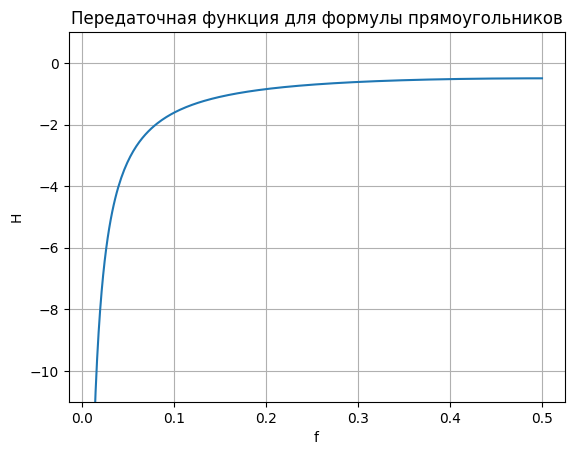

In [ ]:

def rect(f):
  return (1 / (2j * math.sin(math.pi * f))).imag

def trap(f):
  return (math.cos(math.pi * f) / (2j * math.sin(math.pi * f))).imag

def simpson(f):
  return ((math.cos(2 * math.pi * f) + 2) / (3j * math.sin(2 * math.pi * f))).imag

def gamma_rect(f):
  return math.pi * f / math.sin(math.pi * f)

def gamma_trap(f):
  return np.cos(math.pi * f) * math.pi * f / math.sin(math.pi * f)

def gamma_simpson(f):
  return ((2 + math.cos(2 * np.pi * f)) * 2 * math.pi * f) / (3 * np.sin(2 * np.pi * f))

def draw_plot(x, y, title, xlbl, ylbl, y_limits=(-11, 1)):
  plt.title(title)
  plt.grid()
  plt.xlabel(xlbl)
  plt.ylabel(ylbl)
  if y_limits:
    plt.ylim(*y_limits)
  plt.plot(x, y)

f = np.linspace(0.01, 0.5, 300)
draw_plot(f, np.vectorize(rect)(f), "Передаточная функция для формулы прямоугольников", "f", "H")


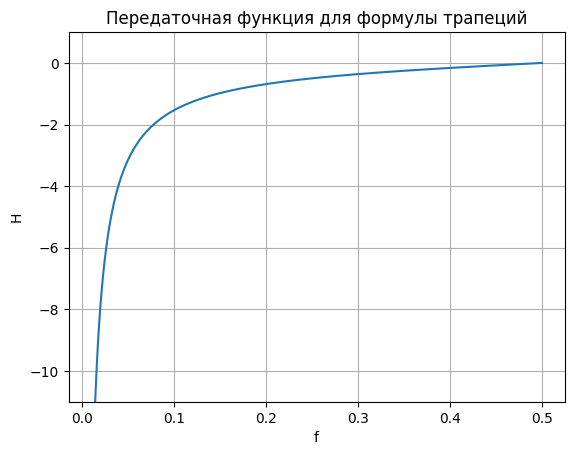

In [ ]:
draw_plot(f, np.vectorize(trap)(f), "Передаточная функция для формулы трапеций", "f", "H")


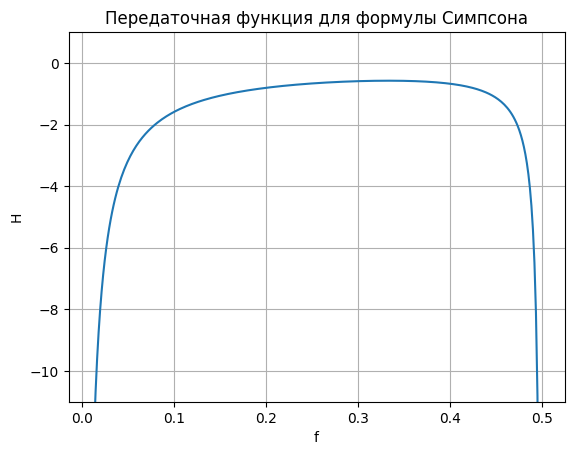

In [ ]:
draw_plot(f, np.vectorize(simpson)(f), "Передаточная функция для формулы Симпсона", "f", "H")


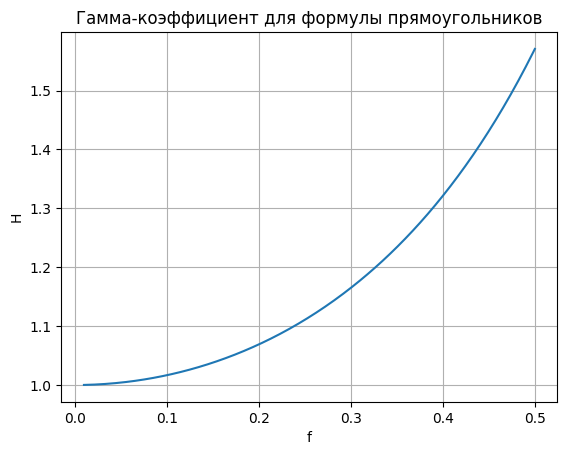

In [ ]:
draw_plot(f, np.vectorize(gamma_rect)(f), "Гамма-коэффициент для формулы прямоугольников", "f", "H", y_limits=None)


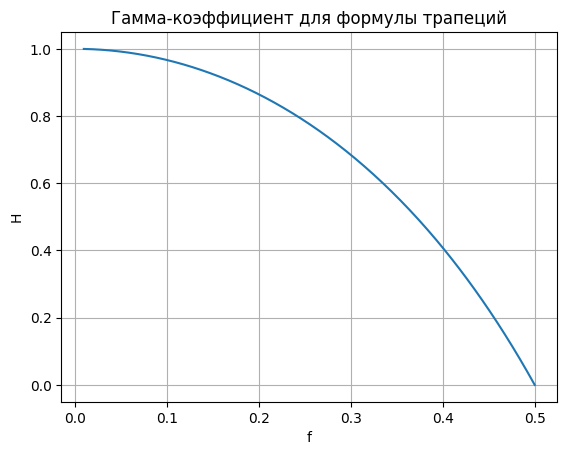

In [ ]:
draw_plot(f, np.vectorize(gamma_trap)(f), "Гамма-коэффициент для формулы трапеций", "f", "H", y_limits=None)


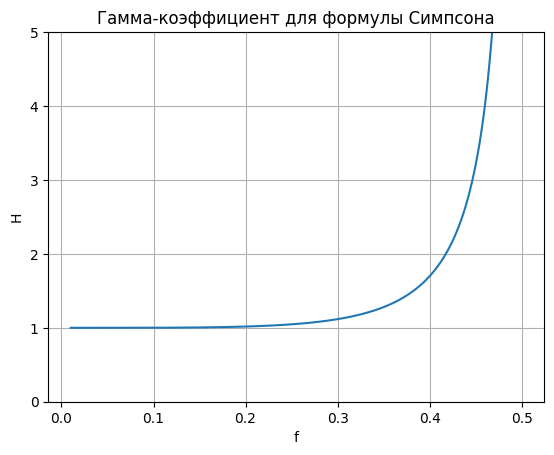

In [ ]:
draw_plot(f, np.vectorize(gamma_simpson)(f), "Гамма-коэффициент для формулы Симпсона", "f", "H", y_limits=(0, 5))


### 2. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8». Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

**Правило 3/8:**
$$y_{n+2}=y_{n-1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_{n}+x_{n-1})$$ \\

**Выведем формулу передаточной функции**: \\

Пусть:   $s_{n}=e^{i\omega n}$, $y_{n}=H(\omega)e^{i\omega n}$

Тогда:

$$H(\omega)e^{i\omega (n+2)}=H(\omega)e^{i\omega (n-1)}+\frac{1}{8}(e^{i\omega (n+2)}+3e^{i\omega (n+1)}+3e^{i\omega n}+e^{i\omega (n-1)})$$

$$H(\omega)e^{i\omega n}e^{2i\omega}=H(\omega)e^{i\omega n}e^{-i\omega}+\frac{1}{8}(e^{i\omega n}e^{2i\omega}+3e^{i\omega n}e^{i\omega}+3e^{i\omega n}+e^{i\omega n}e^{-i\omega})$$

Разделим на $e^{iwn}$:

$$H(\omega)e^{2i\omega}=H(\omega)e^{-i\omega}+\frac{1}{8}(e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega})$$


Сделаем преобразования:

$$H(\omega)(e^{2i\omega}-e^{-i\omega})=\frac{1}{8}(e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega})$$

$$H(\omega)=\frac{1}{8}\frac{e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega}}{e^{2i\omega}-e^{-i\omega}}$$

$$H(\omega)=\frac{1}{8}\frac{e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega}}{e^{2i\omega}-e^{-i\omega}}\cdot \frac{e^{\frac{-i\omega}{2}}}{e^{\frac{-i\omega}{2}}}$$

$$H(\omega)=\frac{1}{8}\frac{e^{\frac{3i\omega}{2}}+e^{\frac{-3i\omega}{2}}+3e^{\frac{i\omega}{2}}+3e^{\frac{-i\omega}{2}}}{e^{\frac{3i\omega}{2}}-e^{\frac{-3i\omega}{2}}}$$

Применим формулы Эйлера:

$$H(\omega)=\frac{1}{8}\frac{cos(\frac{3\omega}{2})+3cos(\frac{\omega}{2})}{i\cdot sin(\frac{3\omega}{2})}$$

Перейдем от $w$ к $f$:

$$\tilde{H}(f)=\frac{1}{8}\frac{cos(3\pi f)+3cos(\pi f)}{i\cdot sin(3\pi f)}$$

<ipython-input-7-a71572a4b163>:1: RuntimeWarning: divide by zero encountered in divide
  H_rule3_8 = lambda f: ((np.cos(3*np.pi*f)+3*np.cos(np.pi*f))/(8j*np.sin(3*np.pi*f))).imag
<ipython-input-7-a71572a4b163>:1: RuntimeWarning: invalid value encountered in divide
  H_rule3_8 = lambda f: ((np.cos(3*np.pi*f)+3*np.cos(np.pi*f))/(8j*np.sin(3*np.pi*f))).imag


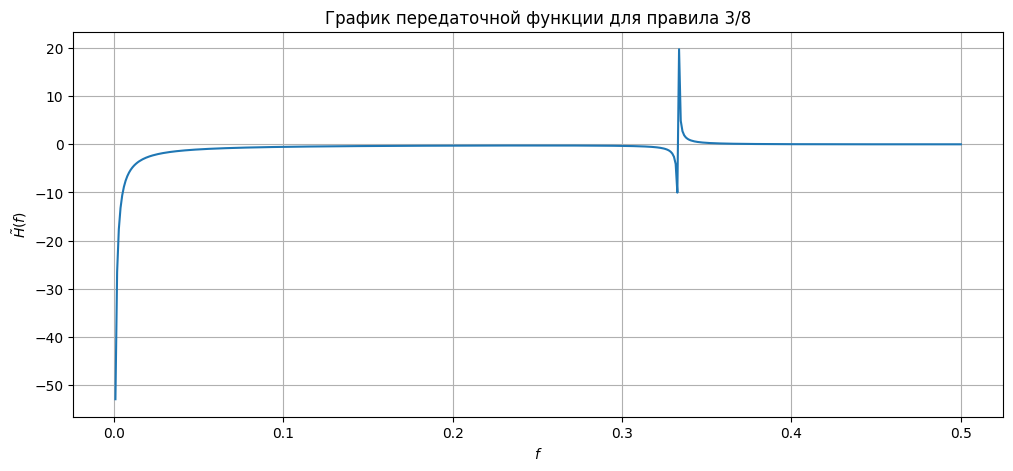

In [ ]:
H_rule3_8 = lambda f: ((np.cos(3*np.pi*f)+3*np.cos(np.pi*f))/(8j*np.sin(3*np.pi*f))).imag

f = np.linspace(0, 0.5, 500)

plt.figure(figsize=(12, 5))
plt.plot(f, H_rule3_8(f))
plt.title("График передаточной функции для правила 3/8")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')
plt.grid()

plt.show()

**Интерпретация частотных свойств передаточной функции**: \\
Можем наблюдать в районе низких частот сильный спад передаточной функции, а в районе 0.33 скачек . В области слева от 0.33 передаточная функция постепеннно уменьшается, в области частот правее 0.33 сначала передаточня функция имеет высокое значение  с постепеннным уменьшением.  

**Отношение значений**:
$$\gamma = \frac{вычисленное}{точное}= \frac{y_n}{e^{iwn}/iw} = \frac{H(w)e^{iwn}}{e^{iwn}/iw} = iwH(w) = \frac{cos(\frac{3\omega}{2})+3cos(\frac{\omega}{2})}{12} \frac{\frac{3\omega}{2}}{sin(\frac{3\omega}{2})}=\frac{cos(3\pi f)+3cos(\pi f)}{12} \frac{3\pi f}{sin(3\pi f)}$$

<ipython-input-13-b6f2b36eef88>:1: RuntimeWarning: invalid value encountered in divide
  y_rule38 =  lambda f : (np.cos(3*np.pi*f)+3*np.cos(np.pi*f))*3*np.pi*f/(12*np.sin(3*np.pi*f))


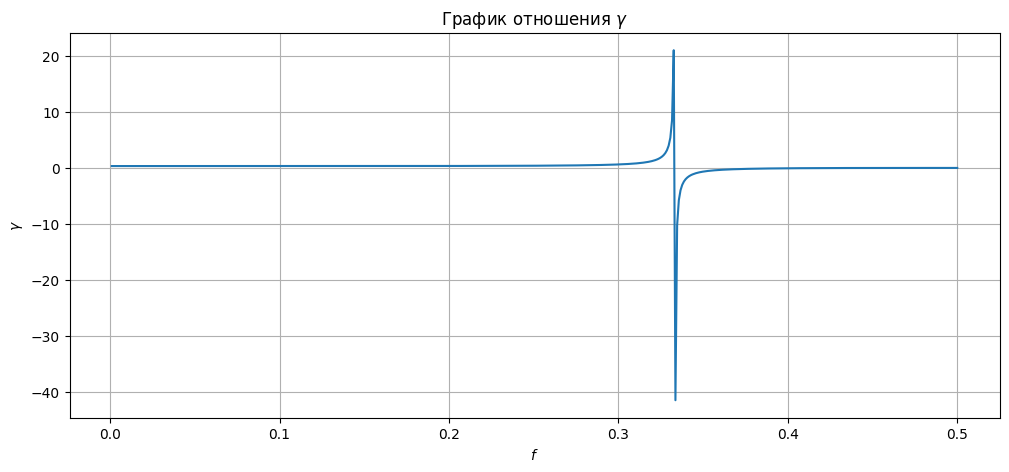

In [ ]:
y_rule38 =  lambda f : (np.cos(3*np.pi*f)+3*np.cos(np.pi*f))*3*np.pi*f/(12*np.sin(3*np.pi*f))

f = np.linspace(0, 0.5, 500)

plt.figure(figsize=(12, 5))
plt.plot(f, y_rule38(f))
plt.title("График отношения $\gamma$")
plt.xlabel('$f$')
plt.ylabel(r'$\gamma$')
plt.grid()

plt.show()

### 3. Сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п.1 и 2.

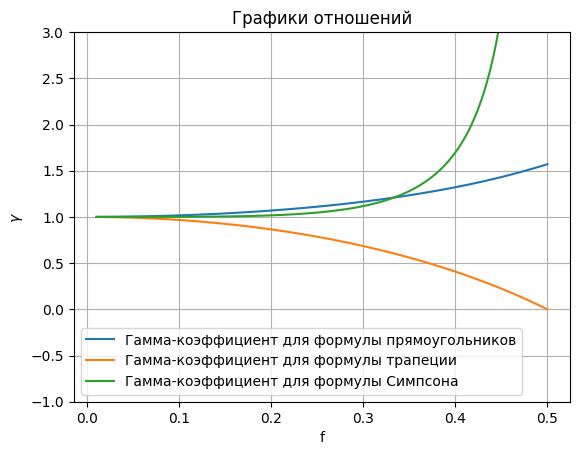

In [ ]:
plt.title("Графики отношений")
plt.ylim(-1, 3)
plt.xlabel("f")
plt.ylabel(r'$\gamma$')
plt.grid()

plt.plot(f, np.vectorize(gamma_rect)(f), label="Гамма-коэффициент для формулы прямоугольников")
plt.plot(f, np.vectorize(gamma_trap)(f), label="Гамма-коэффициент для формулы трапеции")
plt.plot(f, np.vectorize(gamma_simpson)(f), label="Гамма-коэффициент для формулы Симпсона")


plt.legend()

## Выводы

В ходе выполнения практической работы были выведены формулы передаточных функций рекусивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона и интегрированию «по правилу 3/8». Построены для каждогого случая графики соответствующих передаточных функций и отношений вычисляемого в результате фильтрации значения к истинному. Проведен сопоставительный анализ частотных характеристик передаточных функций.

В результате работы были приобретены навыки выведения формул передаточных функций для различных рекурсивных фильров и визуализации данных функций.
